# Prediction Of Traffic Accident Severity In The UK

_CASA0006 Final Assignmnet_

<a id="1"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;[[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)]  


## 1.Introduction

In the UK, the upward trend of urbanization causes a great number of vehicles, which is the reason for serious traffic problems such as congestion and traffic accidents, the  latter is responsible for thousands of deaths every year as well as the huge economic loss (Ren et al., 2017). Combining big traffic accident data with machine learning, more attentions have been attached on how to reduce the traffic risk and provide safer roads.

Traffic accidents data of the UK in 2019 will be used in this notebook, looking inside into this big dataset to see the details of these crashes, extracting patterns from it and train model to predict accident severity. Since traffic severity is already labelled in this data, the methodology is in the field of supervised learning, specifically classification in this work. Two classifiers (decision trees, and random forests) will be used for training data. Also, a comparison will be made between them to choose the best model for further prediction in new data. 


--_Here are all packages that will be used to run the code and the initial settings of this notebook, some with a brief introduction. Except for libraries in the Docker environment which this work run under, 'imblearn' should be installed as well, which helps to handle the imbalanced data._

In [1]:
# This install helps to handle the imbalance data.
# Version is 0.8.0

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# for data processing
import pandas as pd
import csv
import numpy as np
from sklearn.preprocessing import StandardScaler # standardize characteristic data
from sklearn.model_selection import train_test_split # split the data into training and testing 
from imblearn.under_sampling import RandomUnderSampler # fight imbalanced data ( the way of generate new samples)
from collections import Counter

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# training model
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier #random forest

# evaluating the model
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import multilabel_confusion_matrix # multiclass confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report # classification report

# initial setting 
pd.set_option('display.max_rows', 50)  
random_state = 42 # for reproducability
np.random.seed(random_state) # setting numpy random seed, as that is used for sklearn operation
import warnings 
warnings.filterwarnings("ignore") # ignore the warning message

&nbsp;


<a id="2"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)] 
 

## 2.Literature Review

In modern society, transportation is an integral part for everyone, consequently, traffic safety is an important issue. However, the rapid growth of vehicles happens which additionally enlarged the number and the rate of accidents (Krishnan et al., 2018). Some accidents are caused by obvious reasons such as drowsy, drug and drunk driving, however, risk factors are innumerable, some may have no conspicuous effect but still need to be analysed and discovered (Kwon, Rhee and Yoon, 2015). 


There are many pieces researches on traffic accidents studied with machine learning, some are using the unsupervised algorithm, such as using traffic accidents data cluster into categories with distance or density-based similarities between accidents (Filip et al., 2004). Besides, lots of studies focus on the relationship between the accident severity and driving environmental factors listed in the records of traffic accidents. Almost all the existing studies categorized traffic accidents into three severity levels, which are fatal, serious and slight accidents, the dataset used in this notebook classify as this as well. With these clear labels, some supervised machine learning algorithms for classification and regression, such as Logistic Regression, Random Forests (RF), and support-vector machines (SVMs) are implemented on traffic accident severity level (Almamlook et al., 2019). The main difference between regression and classification is that what kind of the output variable is, in regression it is continuous and in classification is discrete. 


What we use in is notebook is classification. The classification analysis learns the training data set and creates a standard predicting model for prediction result (Park and Ha, 2014). Accident severity prediction is essential for emergency response impacts estimation as well as accidents management procedures. A high prediction accuracy rate can give more crucial information. This work aims to train a high accuracy model for traffic accident severity.



&nbsp;


<a id="3"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results](#6)] &nbsp;&nbsp;&nbsp; [[7. Dicussion](#7)] &nbsp;&nbsp;&nbsp; 
[[8. Conclusion](#8)] &nbsp;&nbsp;&nbsp;[[Bibliography](#9)] 
 
 
## 3 Research Question


**The research question of this notebook is: Is it possible build a model to predict traffic accident severity using machine learning classification? And how well the model will fit?**

<a id="4"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)] 
 
## 4 Presentation Of Data

The data used in this notebook is from [data.gov.uk](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data), the file name is `Road Safety Data - Accidents 2019`. 

Varibles can be looked up [here](http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls)

### 4.1 Data preparation

In [4]:
# read the data
Traffic_2019 = pd.read_csv(
    'http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2019.zip',low_memory=False)

In [5]:
# brief view
Traffic_2019

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,2,2,NaN
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,0,1,1,1,0,0,2,2,NaN


In [6]:
Traffic_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

&nbsp;

**Descrptions of some Variables**

` Accident_Severity ` ***1*** ：fatal accident ***2*** ：serious ***3*** ：slight

` Day_of_Week ` ***1-7*** ：Sunday to Monday

` Local_Authority_(District) ` there are ***416*** districts in this dataset  

` 1st_Road_Class` and `2nd_Road_Class ` ***1*** : motorway &nbsp;&nbsp; ***2*** ：primary A-road &nbsp;&nbsp; ***3*** ：non-primary A road &nbsp;&nbsp;***4*** ：B  &nbsp;&nbsp;***5*** ：C &nbsp;&nbsp; ***6*** : unclassified

` Road_Type`  ***1*** ：roundabout &nbsp;&nbsp;***2*** ：one way street &nbsp;&nbsp; ***3*** ：dual carriageway &nbsp;&nbsp;  ***6*** ：single carriageway &nbsp;&nbsp; ***7*** ：slip road  &nbsp;&nbsp; ***9*** : unknown &nbsp;&nbsp; ***12*** : one way street/slip road &nbsp;&nbsp;***-1*** : data missing or out of range
 
` Junction_details `  ***0*** ：not at junction or within 20 metres  &nbsp;&nbsp;***1*** ：roundabout &nbsp;&nbsp; ***2*** ：mini-roundabout &nbsp;&nbsp;  ***3*** ：T or staggered junction &nbsp;&nbsp; ***5*** ：slip road  &nbsp;&nbsp; ***6*** : crossroads &nbsp;&nbsp; ***7*** : more than 4 arms (not roundabout) &nbsp;&nbsp;***8*** :private deivate or entrance ***9*** : other juction &nbsp;&nbsp;  ***-1*** : data missing or out of range

` Junction_Conrol ` ***0*** : not at junction or within 20 metres ***1*** ：authorised person &nbsp;&nbsp;***2*** ：auto traffic signal &nbsp;&nbsp; ***3*** ：stop sign &nbsp;&nbsp;  ***4*** ：give way or uncontrolled &nbsp;&nbsp;***-1*** : data missing or out of range

` Pedestrian_Crossing-Human_Control ` ***0*** : none within 50 metres  ***1*** ：control by school crossing patrol &nbsp;&nbsp;***2*** ：control by other authorised person &nbsp;&nbsp;***-1*** : data missing or out of range

` Pedestrian_Crossing-Physical_Facilities `  ***0*** ：no physical crossing facilities within 50 metres  &nbsp;&nbsp;***1*** ：zebra &nbsp;&nbsp; ***4*** ：pelican, puffin, toucan or similar non-junction pedestrian light crossing &nbsp;&nbsp;  ***5*** ：pedestrian phase at traffic signal junction  &nbsp;&nbsp;  ***7*** : footbridge or subway &nbsp;&nbsp;***8*** :central refuge &nbsp;&nbsp;  ***-1*** : data missing or out of range

` Pedestrian_Crossing-Physical_Facilities ` ***1*** ：daylight &nbsp;&nbsp; ***4*** ：darkness - lights lit &nbsp;&nbsp;  ***5*** ：Darkness - lights unlit  &nbsp;&nbsp; ***6*** : darkness - no lighting &nbsp;&nbsp;***7*** : darkness - lighting unknown &nbsp;&nbsp;***-1*** : data missing or out of range

` Weather_Conditions `  ***1*** ：fine no high winds &nbsp;&nbsp; ***2*** ：raining no high winds &nbsp;&nbsp;  ***3*** ：snowing no high winds &nbsp;&nbsp;***4*** : fine + high winds &nbsp;&nbsp;***5*** ：raining + high winds  &nbsp;&nbsp; ***6*** : snowing + high winds &nbsp;&nbsp; ***7*** : fog or mist &nbsp;&nbsp;***8*** :Other &nbsp;&nbsp; ***9*** : unknown &nbsp;&nbsp  ***-1*** : data missing or out of range

` Road_Surface_Conditions `  ***1*** ：dry &nbsp;&nbsp; ***2*** ：wet or damp &nbsp;&nbsp;  ***3*** ：snow &nbsp;&nbsp;***4*** : frost or ice &nbsp;&nbsp;***5*** ：flood over 3cm. deep &nbsp;&nbsp; ***6*** : oil or diesel &nbsp;&nbsp; ***7*** : Mud ***-1*** : data missing or out of range

` Special_Conditions_at_Site `  ***0*** ：none &nbsp;&nbsp;***1*** ：auto traffic signal - out &nbsp;&nbsp;***2*** : auto signal part defective &nbsp;&nbsp;***3*** : road sign or marking defective or obscured &nbsp;&nbsp; ***4*** ：roadworks &nbsp;&nbsp;  ***5*** ：road surface defective  &nbsp;&nbsp; ***6*** : oil or diesel &nbsp;&nbsp; ***7*** : mud &nbsp;&nbsp;***-1*** : data missing or out of range

` Carriageway_Hazards `  ***0*** ：none &nbsp;&nbsp;***1*** ：vehicle load on road &nbsp;&nbsp;***2*** : other object on road &nbsp;&nbsp;***3*** : previous accident &nbsp;&nbsp; ***4*** ：dog on road &nbsp;&nbsp;  ***5*** ：other animals on road  &nbsp;&nbsp; ***6*** : pedestrian in carriageway - not injured &nbsp;&nbsp; ***7*** : any animal in carriageway (except ridden horse) &nbsp;&nbsp;***-1*** : data missing or out of range

` Urban_or_Rural_Area ` ***1*** ：urban ***2*** ：rural ***3*** ：unallocated

` Did_Police_Officer_Attend_Scene_of_Accident ` ***1*** ：yes ***2*** ：no ***3*** ：no - accident was reported using a self completion  form (self rep only)

<br/> 

Not all the variables are needed in the following analysis, some irrelevance will be ridded. `Location_Easting_OSGR`, ` Location_Northing_OSGR`, `longitude`, `latitude`, `date`, `Local_Authority_(Highway)`, ` 1st_Road_Number`, ` 2nd_Road_Number` and ` LSOA_of_Accident_Location`, these variables will be dropped from the raw data.


In [7]:
cols=['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Longitude', 'Latitude','Date',
      'Local_Authority_(Highway)','1st_Road_Number', '2nd_Road_Number','LSOA_of_Accident_Location']
Traffic_2019_selected=Traffic_2019.drop(columns=cols, axis=1)

We check the null value in the dataset.All the rows with  null value should be dropped from the dataframe.

In [8]:
null_columns=Traffic_2019_selected.columns[Traffic_2019_selected.isnull().any()]
Traffic_2019_selected[null_columns].isnull().sum()

Time    63
dtype: int64

In [9]:
Traffic_2019_selected=Traffic_2019_selected.dropna()
Traffic_2019_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117473 entries, 0 to 117535
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Police_Force                                 117473 non-null  int64 
 1   Accident_Severity                            117473 non-null  int64 
 2   Number_of_Vehicles                           117473 non-null  int64 
 3   Number_of_Casualties                         117473 non-null  int64 
 4   Day_of_Week                                  117473 non-null  int64 
 5   Time                                         117473 non-null  object
 6   Local_Authority_(District)                   117473 non-null  int64 
 7   1st_Road_Class                               117473 non-null  int64 
 8   Road_Type                                    117473 non-null  int64 
 9   Speed_limit                                  117473 non-null  int64 
 

&nbsp;

For better classifying the 'Time' Variable in the data, first, need to change specific time into hour, time is an object, with `astype` we can change the variable category than select the hour, then we divided a day into 5 groups, 1-5 represent  `morning rush` ,  `office hour` ,  `afternoon rush` ,  `evening`, and `late night` . 

&nbsp;

In [10]:
# in our classification, we want to use hour rather than specific time
Traffic_2019_selected['Time'] = Traffic_2019_selected['Time'].astype('str')
Traffic_2019_selected['Time'] = Traffic_2019_selected['Time'].str[0:2]
Traffic_2019_selected['Time'] = Traffic_2019_selected['Time'].astype('int')
Traffic_2019_selected.head(3)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,...,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,3,2,17,1,3,1,30,...,3,0,5,1,1,1,0,0,1,3
1,1,3,2,1,3,21,9,3,2,30,...,-1,-1,-1,4,1,1,0,0,1,3
2,1,3,2,1,3,1,2,4,6,30,...,6,0,0,4,1,1,0,0,1,1


In [11]:
#hour will be labbled into six categories 'morning rush','office hour','afternoon rush','evening','late night'
def hour_category(hour):
    if hour >= 6 and hour < 9:# from 6 to 9 morning rush
        return 1
    elif hour >= 9 and hour < 17:# from 9 to 17 office hour
        return 2 # from 9 to 17
    elif hour >= 17 and hour < 19:# from 17 to 19 afternoon rush
        return 3
    elif hour >= 19 and hour < 23:# from 19 to 23 evening
        return 4
    else:
        return 5 #from 23 to 6 late night


# apply thus function to our temporary hour column
Traffic_2019_selected['Time'] = Traffic_2019_selected['Time'].apply(hour_category)
Traffic_2019_selected.head(3)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,...,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,3,2,3,1,3,1,30,...,3,0,5,1,1,1,0,0,1,3
1,1,3,2,1,3,4,9,3,2,30,...,-1,-1,-1,4,1,1,0,0,1,3
2,1,3,2,1,3,5,2,4,6,30,...,6,0,0,4,1,1,0,0,1,1


Then the whole data will be split as label_data `y` and feature_data `x` , also, these two data split into training and testing sets using package `train_test_split method` from `scikit`, it will automatically split for us with good mixing of records.

In [12]:
y= Traffic_2019_selected.iloc[:,1].values
print(y.shape)

(117473,)


In [13]:
features_data=Traffic_2019_selected.drop('Accident_Severity', axis=1, inplace=False)
x= pd.DataFrame(features_data)
print(x.shape)

(117473, 21)


In [14]:
x.head(10)

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,...,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,2,3,2,3,1,3,1,30,1,...,3,0,5,1,1,1,0,0,1,3
1,1,2,1,3,4,9,3,2,30,0,...,-1,-1,-1,4,1,1,0,0,1,3
2,1,2,1,3,5,2,4,6,30,3,...,6,0,0,4,1,1,0,0,1,1
3,1,1,1,3,5,2,4,6,20,3,...,4,0,0,4,1,1,0,0,1,1
4,1,2,2,3,5,28,3,6,30,6,...,6,0,0,4,1,1,0,0,1,1
5,1,2,3,3,5,17,5,3,30,0,...,-1,0,0,4,1,1,0,0,1,1
6,1,1,1,3,5,20,3,6,30,6,...,4,0,5,4,1,1,0,0,1,1
7,1,3,5,3,5,8,6,6,20,3,...,6,0,0,4,1,1,0,0,1,1
8,1,2,1,3,5,16,3,6,30,6,...,3,0,5,4,1,1,0,0,1,1
9,1,3,1,3,5,22,4,7,30,1,...,3,0,0,4,1,1,0,0,1,1


In [15]:
# standardize data
transfer = StandardScaler()
X = transfer.fit_transform(x)
print(X.shape,y.shape)

(117473, 21) (117473,)


In [16]:
# split into training and testing
x_train,x_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(93978, 21) (23495, 21) (93978,) (23495,)


### 4.2 Look into the data pattern

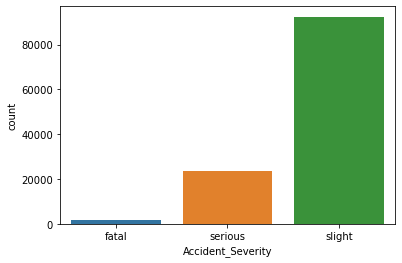

In [17]:
# first we will check the 'label'
count_severity= sns.countplot(Traffic_2019_selected['Accident_Severity'])
count_severity.set_xticklabels(['fatal','serious','slight'])
plt.show()

In [18]:
Traffic_2019_selected.Accident_Severity.value_counts()

3    92403
2    23413
1     1657
Name: Accident_Severity, dtype: int64

&nbsp;

First, we look into our label data--- accident severity level, easily see that almost all the accidents are just slight. This kind of data is called **`imbalanced data`**. 

The canonical machine learning algorithms assume the data are balanced, which means the number of objects in classes is roughly similar (Krawczyk, 2016), if it is too much skewed, like this data, we call it imbalanced data.  In the last few decades, machine learning with imbalanced data has been well discussed since in the real life world skewed distribution of data is very common, which made it difficult for training model (Krawczyk, 2016). There are many ways to fix imbalanced data, in this notebook, we use a package called `imblern` (the version is 0.8.0) which offering a number of re-sampling techniques commonly used in datasets having strong between-class imbalance. With the `RandomOverSampler` from library `imblearn.over_sampling` we can fight imbalance data by generating new samples in the minority classes from existing samples.


In [19]:
# balance the data by generating new objects
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_balance, y_balance = ros.fit_resample(x, y)

# compare imbalanced and balanced 
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_balance))

Original dataset shape Counter({3: 92403, 2: 23413, 1: 1657})
Resample dataset shape Counter({3: 92403, 2: 92403, 1: 92403})


In [20]:
# split the data again using the new data now
xbal_train,xbal_test, ybal_train,ybal_test = train_test_split(x_balance, y_balance,test_size=0.2, random_state=42)

ximbal_train,ximbal_test, yimbal_train,yimbal_test = train_test_split(X, y, test_size=0.2, random_state=42)

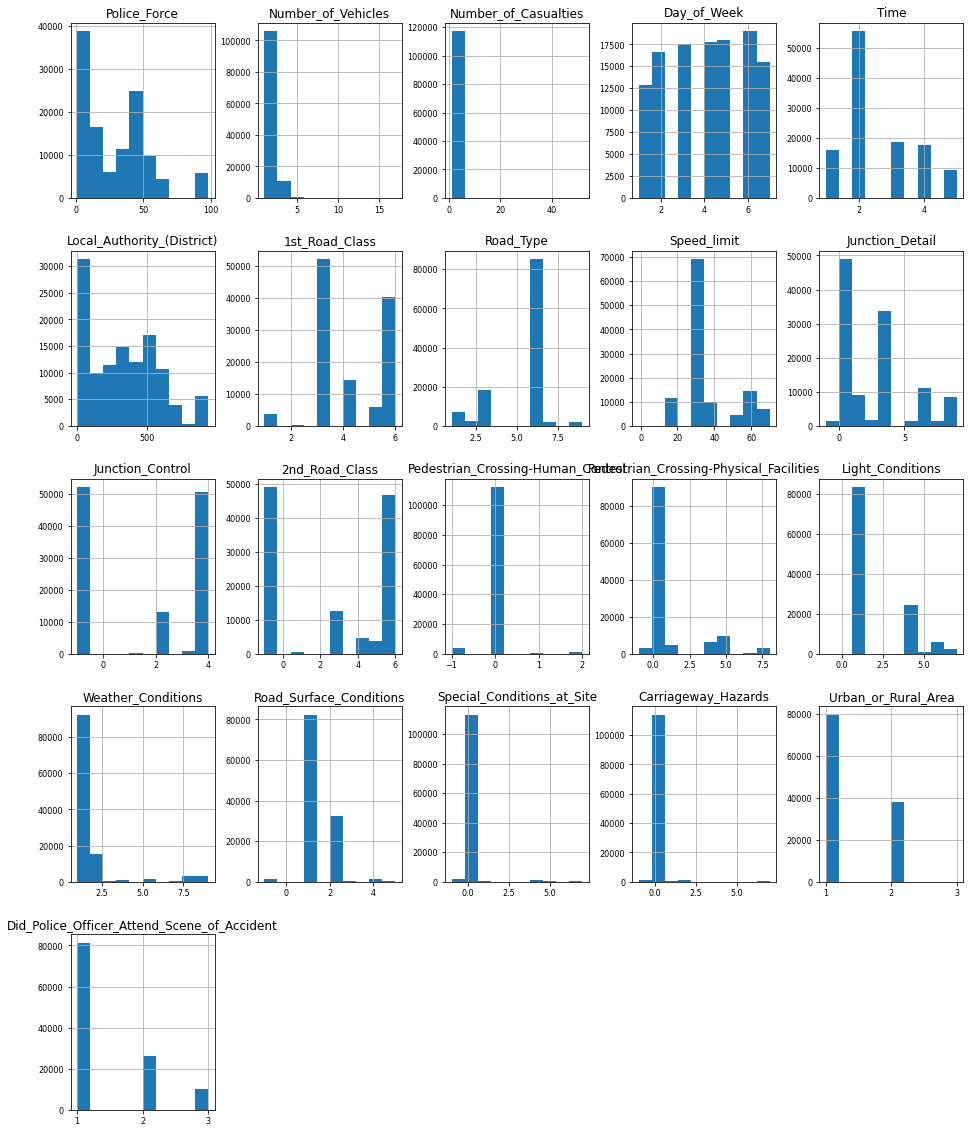

In [21]:
# check the feature variables
x.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

Then, the features variables will be checked briefly with histograms. In this dataset, the -1 represent out of range or lack of data. I think we cannot delete them from the data since it is a kind of data characteristics and have no impaction on the following analysis.

<AxesSubplot:>

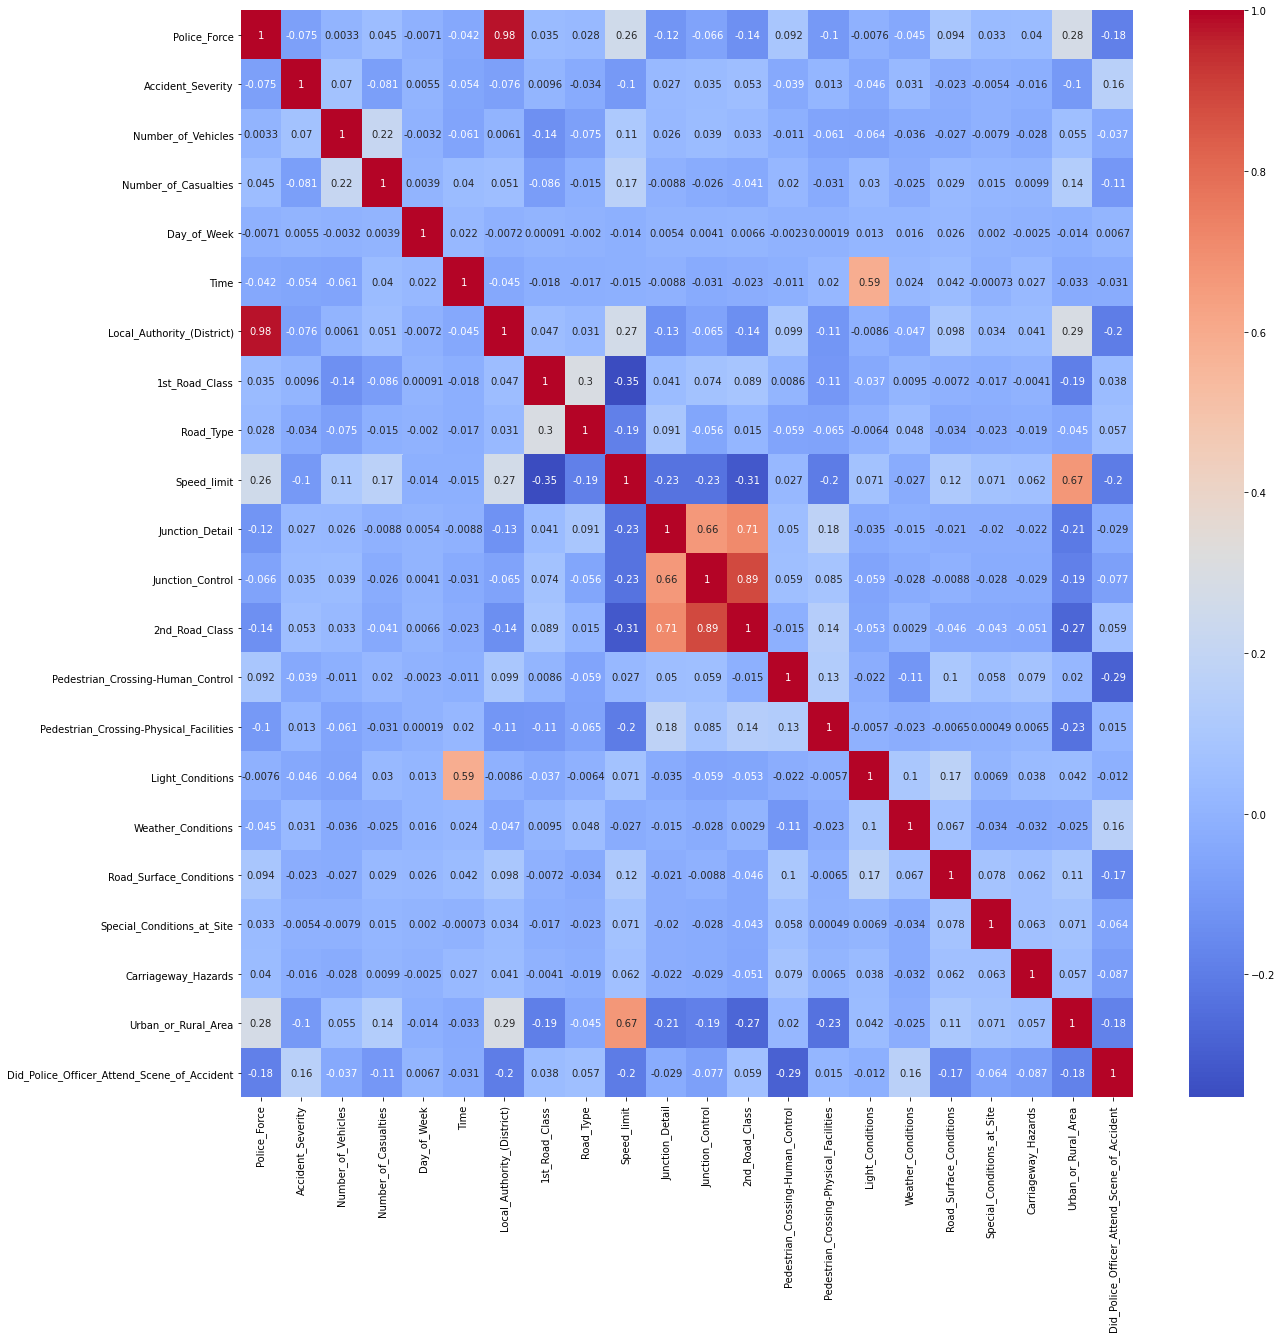

In [22]:
plt.figure(figsize = (20,20))
sns.heatmap(Traffic_2019_selected.corr(),cmap='coolwarm', annot = True)

Finally, a heatmap plotted, which shows the correlation, linear relationship, between variables. There is little correlation between each feature variables and the label (traffic severity). 

<a id="5"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)] 

## 5 Methodology

As powerful classification techniques in machine learning, decision tree and random forest can handle both binary and multiclass classification problem. Also, they can not only do classifying, solve regression problems as well.

The supervised learning method will be used in the following analysis. Two classification algorithms will be used in the training model for multiclass classification, `decision tree` and `random forest`, then assign test data into specific categories of traffic accidents severity. 

<a id="6"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Dicussion](#7)] &nbsp;&nbsp;&nbsp; 
[[8. Conclusion](#8)] &nbsp;&nbsp;&nbsp;[[Bibliography](#9)] 

## 6 Results and Dicussion


`Firstly`, both imbalance data (the original data) and balanced data (fix the imbalance) will be used to train the model. Comparison will be made between the same training model with different data. 



In [23]:
# decision tree
DT= DecisionTreeClassifier(criterion='entropy', max_depth=100)

# using imbalanced data
DT.fit(ximbal_train,yimbal_train)
accuracyDT_imbal= DT.score(ximbal_test, yimbal_test)
print(f"The accuracy rate of decision tree using imbalance data is {accuracyDT_imbal} ")

# using balanced data
DT.fit(xbal_train,ybal_train)
accuracyDT_bal = DT.score(xbal_test, ybal_test)
print(f"The accuracy rate of decision tree using balanced  data is {accuracyDT_bal} ")

The accuracy rate of decision tree using imbalance data is 0.6706107682485635 
The accuracy rate of decision tree using balanced  data is 0.910068179358609 


In [24]:
# random forests
RF= RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=100)

# using imbalanced data
RF.fit(ximbal_train,yimbal_train)
accuracyRF_imbal= RF.score(ximbal_test, yimbal_test)
print(f"The accuracy rate of random forests using imbalance data is {accuracyRF_imbal} ")

# using balanced data
RF.fit(xbal_train,ybal_train)
accuracyRF_bal = RF.score(xbal_test, ybal_test)
print(f"The accuracy rate of random forests using balanced  data is  {accuracyRF_bal} ")

The accuracy rate of random forests using imbalance data is 0.7731432219621196 
The accuracy rate of random forests using balanced  data is  0.94524007070452 


&nbsp;

From the above results, we can find out after fixing the imbalance problem, the model performs better with a higher accuracy rate, so in the following analysis, estimators training with imbalance data will be ignored.

The `second` step is to do a comparison between the multiple class confusion matrix of the decision tree and random forest. For multiclass classification, the confusion matrix tells details of prediction accuracy for each class
&nbsp;




Text(0.5, 1.0, '\nConfusion Matrix of Decision Tree\n')

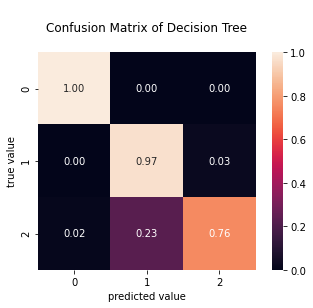

In [25]:
# plot confusion matrix for decision tree
yDT_pred = DT.predict(xbal_test)

#importing confusion matrix

conf_DT = confusion_matrix(ybal_test, yDT_pred)
rows_DT =conf_DT.sum(axis=1, keepdims=True)
norm_conf_DT = conf_DT / rows_DT

sns.heatmap(norm_conf_DT,square=True, annot=True, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('\nConfusion Matrix of Decision Tree\n')

Text(0.5, 1.0, '\nConfusion Matrix of Random Forest\n')

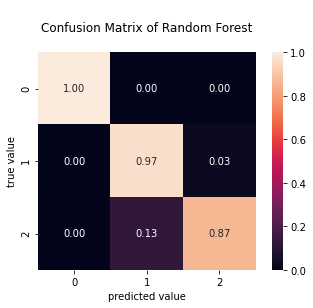

In [26]:
# plot confusion matrix for decision tree
yRF_pred = RF.predict(xbal_test) # predicted value

#importing confusion matrix

conf_RF = confusion_matrix(ybal_test, yRF_pred)
rows_RF =conf_RF.sum(axis=1, keepdims=True)
norm_conf_RF = conf_RF / rows_RF

sns.heatmap(norm_conf_RF,square=True, annot=True, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('\nConfusion Matrix of Random Forest\n')

The above two confusion matrixes show that both two classifiers give a good prediction to the first two class of traffic accident severity, level 1 (fatal accidents) and level 2 (serious accident), the random forest classifier performs better on slight accidents, the accuracy rate is 87% which is 12% more than the decision tree. 

The `third` step is to compare the classification reports for two classifiers.

In [27]:
print('\n Decision Tree Classification Report\n')
print(classification_report(ybal_test, yDT_pred, target_names=['fatal', 'serious', 'slight']))

print('\n Random Forest Classification Report\n')
print(classification_report(ybal_test, yRF_pred, target_names=['fatal', 'serious', 'slight']))


 Decision Tree Classification Report

              precision    recall  f1-score   support

       fatal       0.98      1.00      0.99     18488
     serious       0.81      0.97      0.88     18599
      slight       0.97      0.76      0.85     18355

    accuracy                           0.91     55442
   macro avg       0.92      0.91      0.91     55442
weighted avg       0.92      0.91      0.91     55442


 Random Forest Classification Report

              precision    recall  f1-score   support

       fatal       0.99      1.00      1.00     18488
     serious       0.88      0.97      0.92     18599
      slight       0.97      0.87      0.91     18355

    accuracy                           0.95     55442
   macro avg       0.95      0.95      0.94     55442
weighted avg       0.95      0.95      0.94     55442



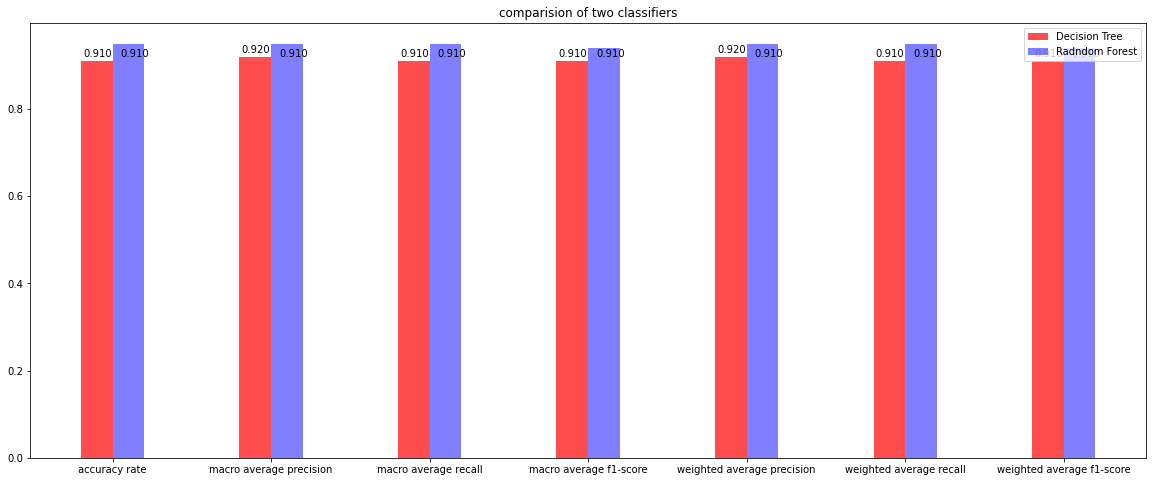

In [28]:
# visualisation of the classification report

plt.figure(figsize=(20,8))
Y1 = [0.91,0.92,0.91,0.91,0.92,0.91,0.91]
Y2 = [0.95,0.95,0.95,0.94,0.95,0.95,0.94]
X = np.arange(len(Y1))

bar_width = 0.2
tick_label = ['accuracy rate','macro average precision','macro average recall','macro average f1-score',
              'weighted average precision','weighted average recall','weighted average f1-score']

for x,y1 in zip(X,Y1):
    plt.text(x+0.005,y1+0.005,'%.3f' %y1, ha='center',va='bottom')

for x,y2 in zip(X,Y2):
    plt.text(x+0.24,y1+0.005,'%.3f' %y1, ha='center',va='bottom')
 
plt.bar(X, Y1, bar_width, align="center", color="red", label="Decision Tree", alpha=0.7)
plt.bar(X+bar_width, Y2, bar_width, color="blue", align="center", \
        label="Radndom Forest", alpha=0.5)

plt.title('comparision of two classifiers')
plt.xticks(X+bar_width/2, tick_label)
plt.legend()
#plt.show()


In binary classification, accuracy score, recall score, precision score and f1 score are used for evaluating the prediction results. For multiclass classification, accuracy score is the same as binary one. Also, people use macro average precision, macro average recall, macro average f1-score, weighted average precision, weighted average recall, weighted average f1-score in the multiclass classification report to see how well the model performs. All these evaluations are from 0 to 1, a score close to 0 means bad performance, as it close to 1, it means better model. 


We can see from the bar chart, both two classifiers perform well in the training model with traffic accident data, and the random forest is a little better than the decision tree.


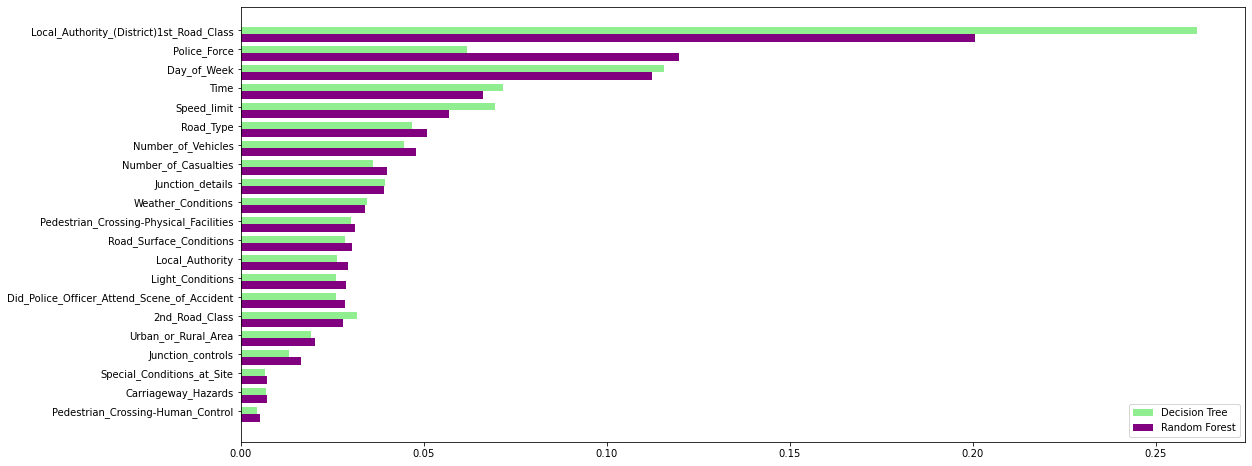

In [29]:
# plot the comparison of features importance in decision tree and random forest
feature_importance=pd.DataFrame({
    'decision_tree':DT.feature_importances_,
    'random_forest':RF.feature_importances_
    },index = ['Police_Force','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Time','Local_Authority_(District)'
               '1st_Road_Class','Road_Type','Local_Authority','Speed_limit','Junction_details','Junction_controls','2nd_Road_Class',
               'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions',
               'Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident'])
feature_importance.sort_values(by='random_forest',ascending=True,inplace=True)
fig, ax = plt.subplots(figsize=(18,8))
index = np.arange(len(feature_importance))
decision_tree_feature=ax.barh(index+0.4,feature_importance['decision_tree'],0.4,color='lightgreen',label='Decision Tree')
random_forest_feature=ax.barh(index,feature_importance['random_forest'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.legend()

The above plot illustrates how important each feature in training the model and do a comparison between decision tree and random forests. From the plot, the decision tree focuses more on one feature, and the random forests algorithm select the feature more balanced and random. This is one of the differences between these two algorithms, the random forest has more generalization ability in training the model, and the randomized feature selection can make random forests more accurate than decision trees (Ali et al., 2012). For this reason, random forest is more suitable for large data with many features

<a id="7"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)] 

## 7. Conclusion

One of the most critical issues in modern society is traffic accidents, which causes a variety of negative impacts, for example, economic losses cause by crashes damage, many people injured even dead in accidents (Almamlook et al., 2019). In most of records of accidents the extent of the damage evaluated by ‘severity’, with severity, accidents are divided into fatal, serious and slight. Prediction for the severity of traffic accidents is useful. Classification is one of the most commonly used method when is comes to the building classifier to predict the accidents (Wahab and Jiang, 2019).

We choose decision tree and random forests algorithm for training the models, from the results, both two classifiers perform well in the data, random forest has a little bit higher accuracy rate and other evaluation such as macro average precision and weighted average f1-score. Decision tree and random forest are both useful in multiclass classification, however, when it comes to large data with a variety of features, random forest always performs better. In this data set, there are more than 100,000 samples for training and testing in total so it is no surprising random forest has a better prediction result.

In conclusion, back to the research question, it is possible to build a model to predict traffic accident severity using machine learning classification and both decision tree and classification can predict more than 90 per cent of the data. 


<a id="8"></a>
[[1. Introduction](#1)] &nbsp;&nbsp;&nbsp; [[2. Literature. review](#2)] &nbsp;&nbsp;&nbsp; [[3. Research Question](#3)] &nbsp;&nbsp;&nbsp;[[4. Data Presentation](#4)] &nbsp;&nbsp;&nbsp; [[5. Methodology](#5)]&nbsp;&nbsp;&nbsp; [[6. Results and Dicussion](#6)] &nbsp;&nbsp;&nbsp; [[7. Conclusion](#7)] &nbsp;&nbsp;&nbsp; [[8. Bibliography](#8)] 

##  Bibliography

Ali, J., Khan, R., Ahmad, N. and Maqsood, I. (2012). ‘Random Forests and Decision Trees’. International Journal of Computer Science Issues, 9 (5), pp. 272–278.


Almamlook, R. E., Kwayu, K. M., Alkasisbeh, M. R. and Frefer, A. A. (2019). ‘Comparison of Machine Learning Algorithms for Predicting Traffic Accident Severity’. in 2019 IEEE Jordan International Joint Conference on Electrical Engineering and Information Technology (JEEIT). IEEE. doi: 10.1109/jeeit.2019.8717393.


Filip, C., Wets, G., Thomas, I., Group, M. and Centrum, L. U. (2004). ‘Road Traffic Accident Clustering with Categorical Attributes’. Journal of 2004 Annual Meeting CD-ROM, (April), pp. 1–19.


Krawczyk, B. (2016). ‘Learning from imbalanced data: open challenges and future directions’. Progress in Artificial Intelligence. Springer Berlin Heidelberg, 5 (4), pp. 221–232. doi: 10.1007/s13748-016-0094-0.


Krishnan, P. V, Chandra Sheel, V., Viswanadh, M. V. S., Shetty, C. and Seema, S. (2018). ‘Data Analysis of Road Traffic Accidents to Minimize the rate of Accidents’. in 2018 3rd International Conference on Computational Systems and Information Technology for Sustainable Solutions (CSITSS). IEEE. doi: 10.1109/csitss.2018.8768736.


Kwon, O. H., Rhee, W. and Yoon, Y. (2015). ‘Application of classification algorithms for analysis of road safety risk factor dependencies’. Accident Analysis & Prevention. Elsevier BV, 75, pp. 1–15. doi: 10.1016/j.aap.2014.11.005.


Park, S. H. and Ha, Y. G. (2014). ‘Large Imbalance Data Classification Based on MapReduce for Traffic Accident Prediction’. in 2014 Eighth International Conference on Innovative Mobile and Internet Services in Ubiquitous Computing. IEEE. doi: 10.1109/imis.2014.6.


Ren, H., Song, Y., Liu, J., Hu, Y. and Lei, J. (2017). ‘A Deep Learning Approach to the Prediction of Short-term Traffic Accident Risk’. 21st International Conference on Intelligent Transportation Systems (ITSC), pp. 3346–3351. Available at: http://arxiv.org/abs/1710.09543.


Wahab, L. and Jiang, H. (2019). ‘A comparative study on machine learning based algorithms for prediction of motorcycle crash severity’. PLoS ONE, 14 (4), pp. 1–17. doi: 10.1371/journal.pone.0214966.

